# Exploration of actor ethnicity

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os
from IPython.display import display
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
from SPARQLWrapper import SPARQLWrapper, JSON

In [96]:
# Data source: http://www.cs.cmu.edu/~ark/personas/

# Define the data path
CLEAN_DATA_PATH = 'clean_data/'

In [97]:
# Load the data
characters_df = pd.read_csv(CLEAN_DATA_PATH + 'characters.csv')
display(characters_df.head())

,movie_wiki_id,movie_id,movie_release_date,name,actor_birth_date,actor_gender,actor_height,actor_ethinicity_id,actor_name,actor_age,actor_map_id,id,actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


### Release year  
We are going to do a temporal movies/ character analysis. This is why we can revove all films without any movie release date

In [98]:
#to move higher: Look at release year to simplify and allow year by year analysis
def map_to_year(date):
    if type(date) == float and np.isnan(date):
        return "NA"
    elif len(str(date))==3:
        return str(date)
    else:
        return str(date[0:4])

characters_df["movie_release_date"] = characters_df["movie_release_date"].apply(lambda x: map_to_year(x))
print("Number of movies: ", len(characters_df))
print("number of movies without a movie_release_date:", sum(characters_df["movie_release_date"] == "NA"))
display(characters_df.head())

characters_df = characters_df[characters_df["movie_release_date"] != "NA"]
print("Number of movies after removing those without release date: ", len(characters_df))

Number of movies:  450669
number of movies without a movie_release_date: 9995


,movie_wiki_id,movie_id,movie_release_date,name,actor_birth_date,actor_gender,actor_height,actor_ethinicity_id,actor_name,actor_age,actor_map_id,id,actor_id
0,975900,/m/03vyhn,2001,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


Number of movies after removing those without release date:  440674


### Region of interest

In [99]:
# Load the ID of the movies belonging to each region of interest
asia_id = pd.read_csv(CLEAN_DATA_PATH + 'asia_movies.csv')
europe_id = pd.read_csv(CLEAN_DATA_PATH + 'europe_movies.csv')
india_id = pd.read_csv(CLEAN_DATA_PATH + 'india_movies.csv')
northen_america_id = pd.read_csv(CLEAN_DATA_PATH + 'northen_america_movies.csv')

In [100]:
#Create a df for each region containing the information from all movies od this region
def assign_region(movies_df, region_id_df):
    region_movies_df = pd.merge(region_id_df, movies_df, left_on="movie_id", right_on="movie_id")
    region_movies_df = region_movies_df.drop(columns=["movie_id"])
    return region_movies_df

asia_characters_df = assign_region(characters_df, asia_id) 
europe_characters_df = assign_region(characters_df, europe_id) 
india_characters_df = assign_region(characters_df, india_id) 
northen_america_characters_df = assign_region(characters_df, northen_america_id) 

print("Number of characters playing in Asian movies: ", len(asia_characters_df))
display(asia_characters_df.head())
print("Number of characters playing in European movies: ", len(europe_characters_df))
display(europe_characters_df.head())
print("Number of characters playing in Indian movies: ", len(india_characters_df))
display(india_characters_df.head())
print("Number of characters playing in Northern American movies: ", len(northen_america_characters_df))
display(northen_america_characters_df.head())

Number of characters playing in Asian movies:  19840


,movie_wiki_id,movie_release_date,name,actor_birth_date,actor_gender,actor_height,actor_ethinicity_id,actor_name,actor_age,actor_map_id,id,actor_id
0,24196090,1973,NaN,1949-01-29,F,1.59,/m/019kn7,Junko Miyashita,24.0,/m/07lm3c9,NaN,/m/0h7_6m
1,24196090,1973,NaN,1954-01-14,F,NaN,NaN,Meika Seri,19.0,/m/0gcgmpc,NaN,/m/0gc5pyv
2,24196090,1973,NaN,1933-12-19,M,NaN,NaN,Hatsuo Yamaya,39.0,/m/0gclh_n,NaN,/m/0gc4f1m
3,24196090,1973,NaN,NaN,NaN,NaN,NaN,Gô Awazu,NaN,/m/0gcndnj,NaN,/m/0gc67pm
4,24196090,1973,NaN,1935-10-05,M,NaN,NaN,Hideaki Esumi,38.0,/m/0gdnsr2,NaN,/m/0gdk2yd


Number of characters playing in European movies:  66276


,movie_wiki_id,movie_release_date,name,actor_birth_date,actor_gender,actor_height,actor_ethinicity_id,actor_name,actor_age,actor_map_id,id,actor_id
0,9363483,1987,NaN,1954-05-08,M,1.83,NaN,David Keith,32.0,/m/02t9_0c,NaN,/m/036496
1,9363483,1987,NaN,1960-11-29,F,1.75,NaN,Cathy Moriarty,26.0,/m/02vct27,NaN,/m/07g60h
2,261236,1983,NaN,1950-06-20,F,NaN,NaN,Gudrun Landgrebe,32.0,/m/02vb3cv,NaN,/m/09d6hv
3,261236,1983,NaN,1950-08-02,M,NaN,NaN,Mathieu Carrière,32.0,/m/02tbd9f,NaN,/m/06prxs
4,261236,1983,NaN,1947-06-18,M,NaN,NaN,Hanns Zischler,35.0,/m/02vdfng,NaN,/m/09k3x_


Number of characters playing in Indian movies:  32070


,movie_wiki_id,movie_release_date,name,actor_birth_date,actor_gender,actor_height,actor_ethinicity_id,actor_name,actor_age,actor_map_id,id,actor_id
0,20604092,2007,NaN,1962-08-17,M,NaN,NaN,Thirumavalavan,44.0,/m/0k20pks,NaN,/m/02wwms_
1,11448183,1984,Havaldar,1913-08-01,M,NaN,/m/0dryh9k,Bhagwan Dada,70.0,/m/0jsfnr4,/m/0jsfnr7,/m/0cg0tr
2,11448183,1984,Bindiya,1954-10-10,F,1.7,/m/0dryh9k,Rekha Ganesan,29.0,/m/02tbhjj,/m/0h8k4_h,/m/06wvfq
3,11448183,1984,Radha A. Kumar,1954-10-10,F,1.7,/m/0dryh9k,Rekha Ganesan,29.0,/m/0jvgf02,/m/0jvgf05,/m/06wvfq
4,11448183,1984,Radha S. Kapoor,1954-10-10,F,1.7,/m/0dryh9k,Rekha Ganesan,29.0,/m/0jvgf0h,/m/0jvgf0l,/m/06wvfq


Number of characters playing in Northern American movies:  190160


,movie_wiki_id,movie_release_date,name,actor_birth_date,actor_gender,actor_height,actor_ethinicity_id,actor_name,actor_age,actor_map_id,id,actor_id
0,975900,2001,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,2001,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,2001,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,2001,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,2001,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


### Check for missing data in actor ethnicity

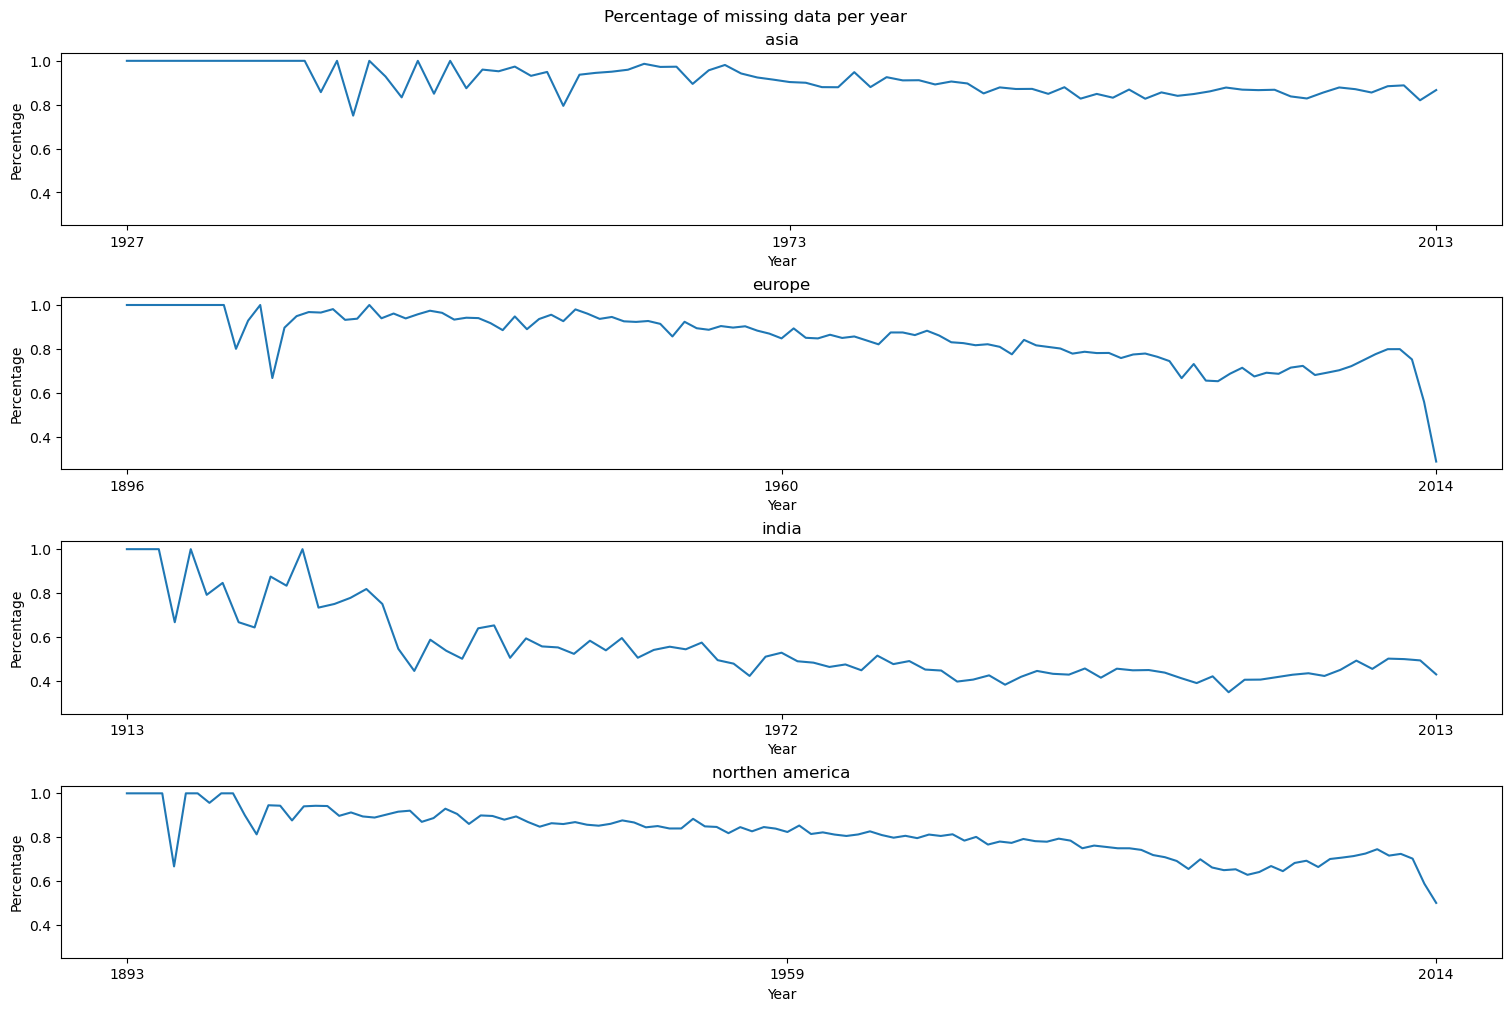

In [101]:
def percentage_missing_data(df, region, ax):
    # Indicator variable showing that something is NA
    df["ethnicity_is_na"] = df.actor_ethinicity_id.isna()

    # % of missing data
    missing_ethnicity_data = df.groupby("movie_release_date").ethnicity_is_na.mean()
    
    # Plot it
    ax.plot(missing_ethnicity_data)
    ax.set(xlabel='Year', ylabel='Percentage')
    ax.set_title(region)
    x_values = ax.get_xticks()
    new_x = [x_values[i] for i in [0, len(x_values) //2, -1]]
    ax.set_xticks(new_x)

fig, axs = plt.subplots(4, sharey=True, figsize=(15, 10), layout='constrained')
fig.suptitle("Percentage of missing data per year")
percentage_missing_data(asia_characters_df, "asia", axs[0])
percentage_missing_data(europe_characters_df, "europe", axs[1])
percentage_missing_data(india_characters_df, "india", axs[2])
percentage_missing_data(northen_america_characters_df, "northen america", axs[3])
plt.show()

We can observe a large proportion of NaN values for actor ethnicity in our four different groups. We can remove these NaN value because we have not enough ressources to get the corresponding ethnicity by using scrapping for missing actors

In [102]:
len_asia_df_na = len(asia_characters_df)
asia_characters_df = asia_characters_df.dropna(subset=['actor_ethinicity_id'])
print("We removed ", len_asia_df_na - len(asia_characters_df), " character of asian movies with no registered ethnicity ID")
print("It remains ", len(asia_characters_df), " character of asian movies.")

len_europe_df_na = len(europe_characters_df)
europe_characters_df = europe_characters_df.dropna(subset=['actor_ethinicity_id'])
print("We removed ", len_europe_df_na - len(europe_characters_df), " character of european movies with no registered ethnicity ID")
print("It remains ", len(europe_characters_df), " character of european movies.")

len_india_df_na = len(india_characters_df)
india_characters_df = india_characters_df.dropna(subset=['actor_ethinicity_id'])
print("We removed ", len_india_df_na - len(india_characters_df), " character of indian movies with no registered ethnicity ID")
print("It remains ", len(india_characters_df), " character of indian movies.")

len_northen_america_df_na = len(northen_america_characters_df)
northen_america_characters_df = northen_america_characters_df.dropna(subset=['actor_ethinicity_id'])
print("We removed ", len_northen_america_df_na - len(northen_america_characters_df), " character of northen american movies with no registered ethnicity ID")
print("It remains ", len(northen_america_characters_df), " character of northen american movies.")

We removed  17329  character of asian movies with no registered ethnicity ID
It remains  2511  character of asian movies.
We removed  51330  character of european movies with no registered ethnicity ID
It remains  14946  character of european movies.
We removed  14570  character of indian movies with no registered ethnicity ID
It remains  17500  character of indian movies.
We removed  140969  character of northen american movies with no registered ethnicity ID
It remains  49191  character of northen american movies.


### Transform author ethnicity ID

In [103]:
def get_ethnicity(freebase_id):
    
    endpoint_url = "https://query.wikidata.org/sparql"
    query = """
    SELECT ?item ?itemLabel WHERE {
      ?item wdt:P646 '""" + str(freebase_id) + """'.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
    }
    """
    sparql = SPARQLWrapper(endpoint_url)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    
    try:
        results = sparql.query().convert()
        if results["results"]["bindings"]:
            label = results["results"]["bindings"][0]["itemLabel"]["value"]
            return label
        else:
            return "Label not found for the specified Freebase ID"
    except Exception as e:
        return np.nan

In [104]:
# For the 4 groups remove all ethnicity ID duplicates
asia_df_unique_ethnicity = asia_characters_df.copy()
asia_df_unique_ethnicity = asia_df_unique_ethnicity.drop_duplicates(subset='actor_ethinicity_id', keep='first')

europe_df_unique_ethnicity = europe_characters_df.copy()
europe_df_unique_ethnicity = europe_df_unique_ethnicity.drop_duplicates(subset='actor_ethinicity_id', keep='first')

india_df_unique_ethnicity = india_characters_df.copy()
india_df_unique_ethnicity = india_df_unique_ethnicity.drop_duplicates(subset='actor_ethinicity_id', keep='first')

northen_america_df_unique_ethnicity = northen_america_characters_df.copy()
northen_america_df_unique_ethnicity = northen_america_df_unique_ethnicity.drop_duplicates(subset='actor_ethinicity_id', keep='first')

# Creat a Data Frame with only unique ethnicity present in our four groups of interest
df_unique_ethnicity = pd.concat([asia_df_unique_ethnicity, europe_df_unique_ethnicity, india_df_unique_ethnicity, northen_america_df_unique_ethnicity], ignore_index=True)
df_unique_ethnicity = df_unique_ethnicity.drop_duplicates(subset='actor_ethinicity_id', keep='first')
df_unique_ethnicity = df_unique_ethnicity[['actor_ethinicity_id']]

print("Number of different actor ethnicithies represented in all our movies of interest is: ", len(df_unique_ethnicity))

Number of different actor ethnicithies represented in all our movies of interest is:  432


In [93]:
# DO NOT RUN THIS CELL WHEN CSV ALREADY CREATED

# Get ethnicity labels corresponding to the different IDs thanks to Wikidata
#df_unique_ethnicity['ethnicity_Label'] = df_unique_ethnicity['actor_ethinicity_id'].apply(get_ethnicity)

# Save the ethnicity labels / IDs corresponding data into a CSV file
#df_unique_ethnicity.to_csv(CLEAN_DATA_PATH + 'etnicity_labels.csv', index=False)

In [105]:
# Load the CSV file with the ethnicity ID-label mapping
ethnicity_mapping = pd.read_csv(CLEAN_DATA_PATH + 'etnicity_labels.csv')

# Add a new column of our character Data Frame with a new column cprresponding to ethnicity label
asia_characters_df = pd.merge(asia_characters_df, ethnicity_mapping, how='left', on='actor_ethinicity_id')
europe_characters_df = pd.merge(europe_characters_df, ethnicity_mapping, how='left', on='actor_ethinicity_id')
india_characters_df = pd.merge(india_characters_df, ethnicity_mapping, how='left', on='actor_ethinicity_id')
northen_america_characters_df = pd.merge(northen_america_characters_df, ethnicity_mapping, how='left', on='actor_ethinicity_id')

Some ethnicity IDs are not listed into Wikidata data base, so it is impossible to get the corresponding label. In our function these ethnicithy IDs are associated with the label **"Label not found for the specified Freebase ID"**. We decided to removed these labels and take them as missing values

In [106]:
# Remove values with unknow ethnicity labels
asia_characters_df = asia_characters_df[asia_characters_df['ethnicity_Label'] != "Label not found for the specified Freebase ID"]
europe_characters_df = europe_characters_df[europe_characters_df['ethnicity_Label'] != "Label not found for the specified Freebase ID"]
india_characters_df = india_characters_df[india_characters_df['ethnicity_Label'] != "Label not found for the specified Freebase ID"]
northen_america_characters_df = northen_america_characters_df[northen_america_characters_df['ethnicity_Label'] != "Label not found for the specified Freebase ID"]

In [107]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Asian movies actor ethnicities


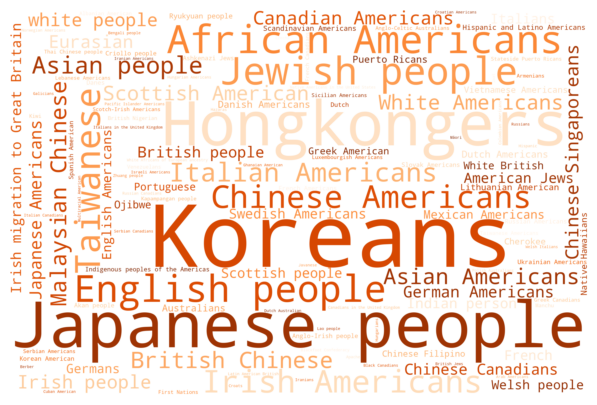

European movies actor ethnicities


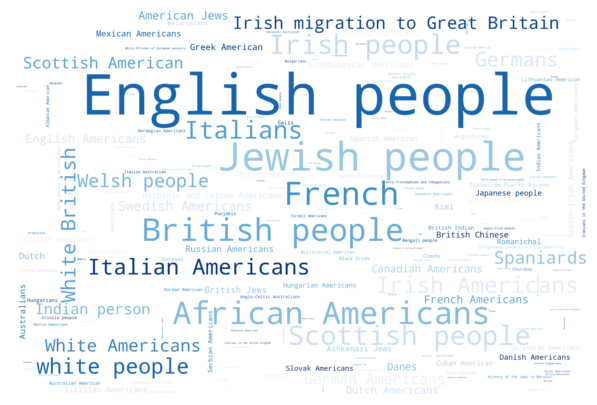

Indian movies actor ethnicities


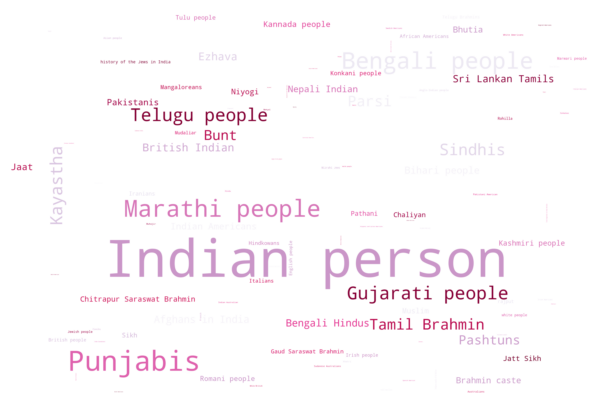

Northen american movies actor ethnicities


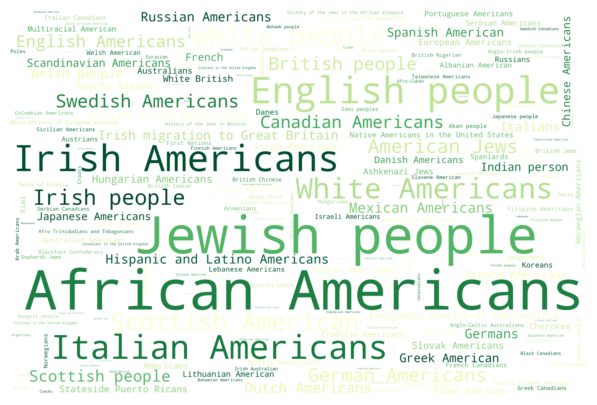

In [235]:
# Transform all different ethnicities present in Asian films into a list
word_list_asia = asia_characters_df['ethnicity_Label'].tolist()
word_list_europe = europe_characters_df['ethnicity_Label'].tolist()
word_list_india = india_characters_df['ethnicity_Label'].tolist()
word_list_northen_america = northen_america_characters_df['ethnicity_Label'].tolist()

# Group lists to be able to iterate over a loop
word_lists = [word_list_asia, word_list_europe, word_list_india, word_list_northen_america]
# Group list to print word cloud title
region_str_list = ["Asian movies actor ethnicities",
                   "European movies actor ethnicities",
                   "Indian movies actor ethnicities",
                   "Northen american movies actor ethnicities"]
colormaps = ['Oranges', 'Blues', 'PuRd_r', 'YlGn_r']

for i, region_list in enumerate(word_lists): 
    # Convert float values to strings
    word_list = [str(word) for word in region_list if not isinstance(word, float)]
    # Count occurences for the different ethnicities
    word_counts = Counter(word_list)
    # Generate the word cloud with size proportional to occurences
    print(region_str_list[i])
    wordcloud = WordCloud(width = 3000, height = 2000, background_color='white', mode="RGBA", colormap=colormaps[i]).generate_from_frequencies(word_counts)
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

We can observe that the ethnicithies associated with actors in this CMU movie dataset are very "precise" and it is very difficult to formed larger subgroup of ethnicities grouping different ethnicities in an ethic manner.

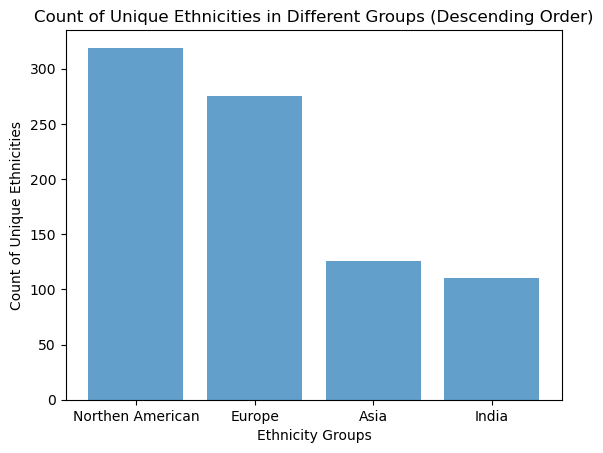

In [170]:
dataframes = [asia_characters_df, europe_characters_df, india_characters_df, northen_america_characters_df]

# Get unique ethnicities for each group
unique_ethnicities = [df['ethnicity_Label'].unique() for df in dataframes]

# Count the number of unique ethnicities for each group
counts_per_group = [len(ethni) for ethni in unique_ethnicities]

# Create a DataFrame with counts and names
df_counts = pd.DataFrame({'Counts': counts_per_group, 'Names': ["Asia", "Europe", "India", "Northen American"]})

# Sort the DataFrame by counts in descending order
df_counts = df_counts.sort_values(by='Counts', ascending=False)

# Plot the bar chart
plt.bar(range(len(df_counts)), df_counts['Counts'], align='center', alpha=0.7)

# Set labels and title
plt.xlabel('Ethnicity Groups')
plt.ylabel('Count of Unique Ethnicities')
plt.title('Count of Unique Ethnicities in Different Groups (Descending Order)')

# Set x-axis ticks and labels
plt.xticks(range(len(df_counts)), df_counts['Names'])

# Show the plot
plt.show()

In [171]:
df_counts

,Counts,Names
3,319,Northen American
1,275,Europe
0,126,Asia
2,110,India


In [231]:
# Function to preprocess DataFrame
def preprocess_df(df):
    df['movie_release_date'] = pd.to_numeric(df['movie_release_date'], errors='coerce')
    df = df[df['movie_release_date'].between(1942, 2013)]
    unique_ethnicities = df.groupby('movie_release_date')['ethnicity_Label'].nunique() / len(df)
    return unique_ethnicities

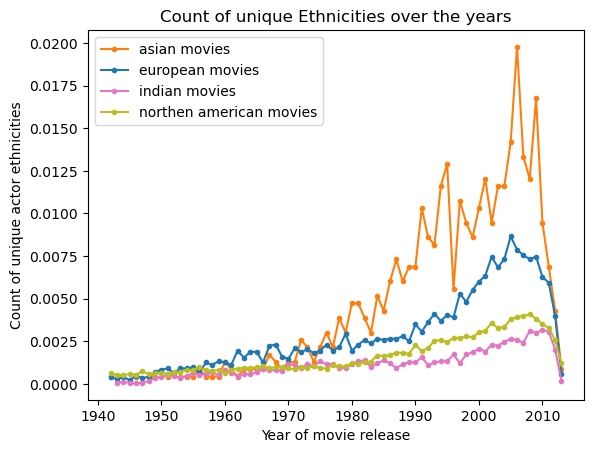

In [232]:
# Preprocess each DataFrame
unique_asian_ethnicities = preprocess_df(asia_characters_df)
unique_european_ethnicities = preprocess_df(europe_characters_df)
unique_indian_ethnicities = preprocess_df(india_characters_df)
unique_na_ethnicities = preprocess_df(northen_america_characters_df)

# Create a common date range
year_range = range(1942, 2014)

# Reindex each DataFrame to fill NaN for missing years
unique_asian_ethnicities = unique_asian_ethnicities.reindex(year_range)
unique_european_ethnicities = unique_european_ethnicities.reindex(year_range)
unique_indian_ethnicities = unique_indian_ethnicities.reindex(year_range)
unique_na_ethnicities = unique_na_ethnicities.reindex(year_range)

# Plotting
plt.plot(unique_asian_ethnicities.index, unique_asian_ethnicities.values, marker='o', linestyle='-', color='tab:orange', markersize=3, label='asian movies')
plt.plot(unique_asian_ethnicities.index, unique_european_ethnicities.values, marker='o', linestyle='-', color='tab:blue', markersize=3, label='european movies')
plt.plot(unique_asian_ethnicities.index, unique_indian_ethnicities.values, marker='o', linestyle='-', color='tab:pink', markersize=3, label='indian movies')
plt.plot(unique_asian_ethnicities.index, unique_na_ethnicities.values, marker='o', linestyle='-', color='tab:olive', markersize=3, label='northen american movies')


# Set labels and title
plt.xlabel('Year of movie release')
plt.ylabel('Count of unique actor ethnicities')
plt.title('Count of unique Ethnicities over the years')

# Show legend
plt.legend()

# Show the plot
plt.show()